In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from selenium import webdriver

In [5]:
options = webdriver.ChromeOptions()
prefs = {"download.default_directory":"/home/henrique/workspace/ceusmar/pos-graduacao/python/repo/3-experimentacao"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/home/henrique/apps/chromedriver_linux64/chromedriver', chrome_options=options)

driver.get("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element_by_partial_link_text('Download')
btn_download.click()

time.sleep(3)

driver.close()

<ipython-input-5-bd6be6aa0fcd>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/home/henrique/apps/chromedriver_linux64/chromedriver', chrome_options=options)
<ipython-input-5-bd6be6aa0fcd>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='/home/henrique/apps/chromedriver_linux64/chromedriver', chrome_options=options)
<ipython-input-5-bd6be6aa0fcd>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  btn_download = driver.find_element_by_partial_link_text('Download')


In [2]:
df = pd.read_csv('IBOVDia_05-01-22.csv', sep=';', skiprows=1)
df.head()

,C�digo,A��o,Tipo,Qtde. Te�rica,Part. (%)
RRRP3,3R PETROLEUM,ON NM,199.733.824,"0,349",NaN
ALPA4,ALPARGATAS,PN EJ N1,167.963.777,"0,284",NaN
ABEV3,AMBEV S/A,ON,4.359.908.680,"3,387",NaN
AMER3,AMERICANAS,ON NM,397.635.158,"0,605",NaN
ASAI3,ASSAI,ON NM,794.310.097,"0,513",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   C�digo         93 non-null     object 
 1   A��o           93 non-null     object 
 2   Tipo           95 non-null     object 
 3   Qtde. Te�rica  94 non-null     object 
 4   Part. (%)      0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.5+ KB


In [10]:
df.index[:-2]

Index(['RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BIDI11',
       'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5',
       'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6',
       'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3',
       'ELET6', 'EMBR3', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3',
       'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3',
       'IGTI11', 'GNDI3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'JHSF3',
       'KLBN11', 'RENT3', 'LCAM3', 'LWSA3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3',
       'CASH3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3',
       'PETZ3', 'POSI3', 'QUAL3', 'RADL3', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11',
       'CSNA3', 'SULA11', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3',
       'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3', 'YDUQ3'],
      dtype='object')

In [11]:
ativos = list(df.index[:-2])
ativos = map(lambda a: f"{a}.SA", ativos)
ativos_sa = " ".join(list(ativos))

ativos_sa

'RRRP3.SA ALPA4.SA ABEV3.SA AMER3.SA ASAI3.SA AZUL4.SA B3SA3.SA BIDI11.SA BPAN4.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA GNDI3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA JHSF3.SA KLBN11.SA RENT3.SA LCAM3.SA LWSA3.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA CASH3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA PRIO3.SA PETZ3.SA POSI3.SA QUAL3.SA RADL3.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA CSNA3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA VBBR3.SA WEGE3.SA YDUQ3.SA'

In [12]:
yf.pdr_override()

In [13]:
cotacoes_ativos = yf.download(tickers=ativos_sa, period='1y')

[*********************100%***********************]  93 of 93 completed


In [14]:
cotacoes_ativos['Adj Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-01-04 to 2022-01-04
Data columns (total 93 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   249 non-null    float64
 1   ALPA4.SA   249 non-null    float64
 2   AMER3.SA   249 non-null    float64
 3   ASAI3.SA   212 non-null    float64
 4   AZUL4.SA   249 non-null    float64
 5   B3SA3.SA   249 non-null    float64
 6   BBAS3.SA   249 non-null    float64
 7   BBDC3.SA   248 non-null    float64
 8   BBDC4.SA   248 non-null    float64
 9   BBSE3.SA   249 non-null    float64
 10  BEEF3.SA   249 non-null    float64
 11  BIDI11.SA  244 non-null    float64
 12  BPAC11.SA  249 non-null    float64
 13  BPAN4.SA   249 non-null    float64
 14  BRAP4.SA   249 non-null    float64
 15  BRFS3.SA   249 non-null    float64
 16  BRKM5.SA   249 non-null    float64
 17  BRML3.SA   249 non-null    float64
 18  CASH3.SA   249 non-null    float64
 19  CCRO3.SA   249 non-null    floa

In [15]:
cotacoes_ativos.head()

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                         
2021-01-04  14.827890  41.190956  75.180000      NaN  37.730000  19.180500   
2021-01-05  15.143991  41.210732  73.500000      NaN  38.200001  19.218245   
2021-01-06  15.450509  38.965755  68.699997      NaN  36.669998  18.903709   
2021-01-07  15.373879  38.273468  67.309998      NaN  36.049999  19.432131   
2021-01-08  15.833660  40.251427  72.000000      NaN  36.599998  19.718361   

                                                        ...      Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  34.891193  20.436411  22.956974  28.207680  ...   3897800.0   
2021-01-05  34.529202  20.338701  22.817003  27.679804  ...   8506600.0   
2021-01-06  35.318169  20.849991  23.573225  27.228714  ...   9998400.0   
2021-01-07  36.719761  21.361267  24.199062  27.804573  ...  11072300.0   
2021-01-08  36.933247  21.196621  23.990448  28.668371  ...   5816400.0   

                                                                      \
             TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   

                                                          
              VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  

[5 rows x 558 columns]

In [16]:
cotacoes_ativos_fechamento = cotacoes_ativos['Adj Close']

In [17]:
# removendo NaN
cotacoes_ativos_fechamento.dropna(how='all', inplace=True)
cotacoes_ativos_fechamento.dropna(axis=1, inplace=True, thresh=248)

<ipython-input-17-9fa9b760f4d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamento.dropna(how='all', inplace=True)
<ipython-input-17-9fa9b760f4d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamento.dropna(axis=1, inplace=True, thresh=248)


In [18]:
cotacoes_ativos_fechamento.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-04 to 2022-01-04
Data columns (total 89 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   249 non-null    float64
 1   ALPA4.SA   249 non-null    float64
 2   AMER3.SA   249 non-null    float64
 3   AZUL4.SA   249 non-null    float64
 4   B3SA3.SA   249 non-null    float64
 5   BBAS3.SA   249 non-null    float64
 6   BBDC3.SA   248 non-null    float64
 7   BBDC4.SA   248 non-null    float64
 8   BBSE3.SA   249 non-null    float64
 9   BEEF3.SA   249 non-null    float64
 10  BPAC11.SA  249 non-null    float64
 11  BPAN4.SA   249 non-null    float64
 12  BRAP4.SA   249 non-null    float64
 13  BRFS3.SA   249 non-null    float64
 14  BRKM5.SA   249 non-null    float64
 15  BRML3.SA   249 non-null    float64
 16  CASH3.SA   249 non-null    float64
 17  CCRO3.SA   249 non-null    float64
 18  CIEL3.SA   249 non-null    float64
 19  CMIG4.SA   249 non-null    floa

In [19]:
percentual_alteracao = cotacoes_ativos_fechamento.pct_change()
percentual_alteracao

,ABEV3.SA,ALPA4.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.021318,0.000480,-0.022346,0.012457,0.001968,-0.010375,-0.004781,-0.006097,-0.018714,-0.019920,...,-0.022869,-0.004683,-0.008292,0.010710,0.016838,0.011442,0.003092,-0.008489,0.061378,0.005000
2021-01-06,0.020240,-0.054476,-0.065306,-0.040052,-0.016366,0.022849,0.025139,0.033143,-0.016297,-0.014228,...,-0.027660,-0.047412,-0.012124,0.048344,0.032796,-0.014480,-0.045006,-0.011197,0.026515,-0.039801
2021-01-07,-0.004960,-0.017767,-0.020233,-0.016908,0.027953,0.039685,0.024522,0.026549,0.021149,-0.005155,...,-0.016047,-0.002660,0.030470,0.048010,0.065278,0.018365,-0.026469,-0.025311,0.041328,0.012496
2021-01-08,0.029907,0.051680,0.069678,0.015257,0.014730,0.005814,-0.007708,-0.008621,0.031067,0.008290,...,0.045219,0.066667,0.025873,-0.004822,-0.003127,0.027953,0.029841,0.026196,0.060477,0.034016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,-0.000644,0.002728,-0.027273,0.003116,-0.013263,-0.005806,-0.000609,-0.003597,0.001928,0.011505,...,-0.010085,-0.017008,0.003434,-0.019282,-0.024066,0.007508,0.018518,-0.004471,0.003618,0.039362
2021-12-29,-0.004510,-0.010884,-0.000322,-0.073398,-0.007168,-0.005153,-0.007312,-0.004642,-0.005772,0.006635,...,0.010188,-0.010642,-0.014374,0.003390,0.002596,-0.017233,0.014141,0.006044,-0.016521,-0.025887
2021-12-30,-0.001942,0.018432,0.018053,0.020956,0.005415,-0.003798,-0.006139,-0.004663,0.003870,-0.001883,...,0.020171,0.026891,0.009722,0.024324,0.009191,0.014218,0.045817,-0.001657,0.007330,0.011811


In [20]:
#calcula o produto acumulado
percentual_acumulado = (1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0] = 1
percentual_acumulado

,ABEV3.SA,ALPA4.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.021318,1.000480,0.977654,1.012457,1.001968,0.989625,0.995219,0.993903,0.981286,0.980080,...,0.977131,0.995317,0.991708,1.010710,1.016838,1.011442,1.003092,0.991511,1.061378,1.005000
2021-01-06,1.041990,0.945978,0.913807,0.971906,0.985569,1.012237,1.020237,1.026844,0.965294,0.966135,...,0.950104,0.948127,0.979685,1.059572,1.050186,0.996796,0.957947,0.980409,1.089520,0.965000
2021-01-07,1.036822,0.929172,0.895318,0.955473,1.013119,1.052408,1.045255,1.054105,0.985709,0.961155,...,0.934858,0.945605,1.009536,1.110442,1.118740,1.015103,0.932591,0.955594,1.134548,0.977059
2021-01-08,1.067830,0.977191,0.957702,0.970050,1.028042,1.058526,1.037199,1.045018,1.016332,0.969123,...,0.977131,1.008646,1.035655,1.105087,1.115242,1.043478,0.960421,0.980627,1.203163,1.010294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,1.046676,0.888254,0.412743,0.682481,0.579241,0.834308,0.802142,0.843810,0.737033,1.166418,...,0.915194,1.025620,0.620205,1.069190,0.991042,1.073562,0.306122,1.127105,0.902504,0.623321
2021-12-29,1.041955,0.878586,0.412610,0.632388,0.575089,0.830009,0.796276,0.839893,0.732779,1.174157,...,0.924518,1.014705,0.611290,1.072815,0.993615,1.055061,0.310451,1.133917,0.887593,0.607185
2021-12-30,1.039932,0.894780,0.420059,0.645640,0.578203,0.826856,0.791388,0.835976,0.735615,1.171946,...,0.943166,1.041992,0.617233,1.098910,1.002747,1.070061,0.324675,1.132038,0.894100,0.614356


In [34]:
# aleatoriedade
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira

['BBDC4.SA', 'BRFS3.SA', 'ENGI11.SA', 'VIIA3.SA', 'LAME4.SA']

In [35]:
carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo'] = carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos


,BBDC4.SA,BRFS3.SA,ENGI11.SA,VIIA3.SA,LAME4.SA,saldo,retorno
Date,,,,,,,
2021-01-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2021-01-05,993.902908,992.085657,994.726554,1003.092099,988.189508,4971.996726,-0.005601
2021-01-06,1026.843738,989.292386,980.078102,957.946796,930.317160,4884.478182,-0.017602
2021-01-07,1054.105054,1020.949757,930.859381,932.591209,918.822014,4857.327415,-0.005559
2021-01-08,1045.017865,1023.277468,949.023328,960.420511,944.983463,4922.722635,0.013463
...,...,...,...,...,...,...,...
2021-12-28,843.809597,1051.676007,907.414240,306.122436,231.885618,3340.907898,0.005062
2021-12-29,839.892952,1040.968393,888.319325,310.451451,231.885618,3311.517739,-0.008797
2021-12-30,835.976390,1048.417176,896.444885,324.675323,233.471159,3338.984933,0.008294


In [ ]:
ibov = yf.download('BOVA11.SA', period='1y')['Adj Close']
ibov = ibov / ibov.iloc[0]
ibov = ibov * 5000
ibov

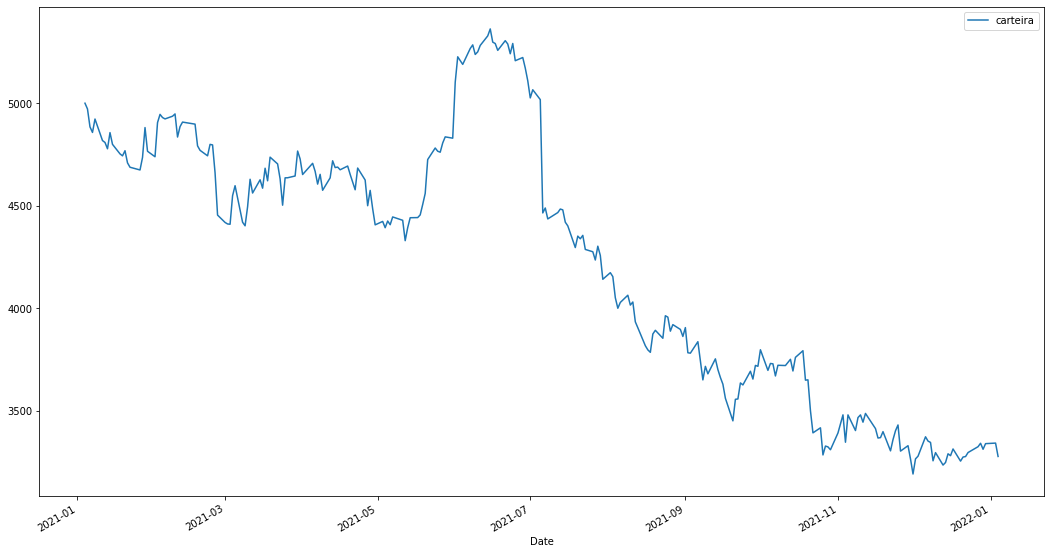

In [36]:
carteira_ativos['saldo'].plot(figsize=(18,10), label="carteira")
# ibov.plot(label='IBOV')
plt.legend()